In [12]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
#loading the dataset
df = pd.read_csv('Linear_regression(Student_marks).csv')

In [7]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [13]:
#Getting to know your data
df.shape

(25, 2)

In [14]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


In [21]:
#checking for missing values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [22]:
#Univariate Analysis
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


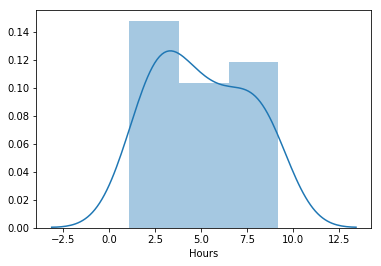

In [24]:
#visualization
sns.distplot(df['Hours'])
plt.show()

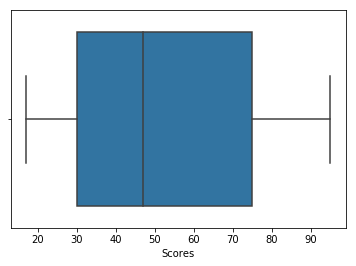

In [25]:
sns.boxplot(df['Scores'])
plt.show()

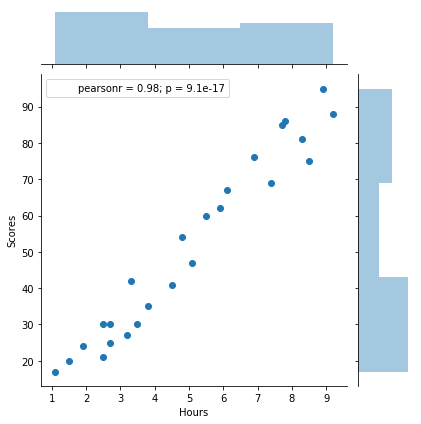

In [28]:
#Bivariate Analysis
sns.jointplot(x = df['Hours'], y = df['Scores'])
plt.show()

In [31]:
#preparing dataset
from sklearn.model_selection import train_test_split as tts
train, test = tts(df, train_size = 0.8, test_size = 0.2)

In [32]:
print(train)

    Hours  Scores
14    1.1      17
20    2.7      30
22    3.8      35
13    3.3      42
19    7.4      69
3     8.5      75
10    7.7      85
16    2.5      30
9     2.7      25
4     3.5      30
2     3.2      27
6     9.2      88
15    8.9      95
12    4.5      41
1     5.1      47
7     5.5      60
0     2.5      21
23    6.9      76
8     8.3      81
17    1.9      24


In [33]:
print(test)

    Hours  Scores
24    7.8      86
5     1.5      20
11    5.9      62
18    6.1      67
21    4.8      54


In [34]:
train_x = train.loc[:, train.columns != 'Scores']
test_x = test.loc[:, test.columns != 'Scores']
train_y = train['Scores']
test_y = test['Scores']

In [39]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [43]:
test_pred = model.predict(test_x)

In [44]:
result = pd.DataFrame({'Actual_Score': test_y, 'Predicted_Score': test_pred})
print(result)

    Actual_Score  Predicted_Score
24            86        77.287265
5             20        16.533826
11            62        58.964799
18            67        60.893479
21            54        48.357056


In [47]:
#computing mean squared error
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(mean_squared_error(test_y, test_pred))
print(mean_absolute_error(test_y, test_pred))

33.254197033838786
5.392715211543166


In [48]:
#computing r2 score
from sklearn.metrics import r2_score
print(r2_score(test_y, test_pred)*100)

92.89683077711919
